# The Tonnetz visualization and interactive Tools

In this notebook you will find an introduction to tools help you understand and play around with the Tonnetz.

The first tool is called web-hexachord developed by Corentin Guichaoua at IRMA Strasbourg.
As per the name, it is a web interactive visualizer of the Tonnetz.
To use it, it is recommended to launch it on Google Chrome.

Let's then carry on with instruction to download, install and launch chrome on your computer:

```sh
wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
sudo apt install ./google-chrome-stable_current_amd64.deb
google-chrome https://guichaoua.gitlab.io/web-hexachord/
```
## Requirements

- numpy
- partitura
- networkx (only for visualization)
- matplotlib (only for visualization)

## Negative Harmony

```shell
google-chrome https://www.youtube.com/watch?v=DnBr070vcNE&t=96s
```


Negative Harmony consists of rotating the Tonnetz Plane around the axis of fifths.
In contrast with the cartesian plane in the Tonnetz the origin point must be also specified.
Traditionally the origin point is found halfway between the distance of C and G.

This rotation results to inverting all chord relations and transposing relative to the point of origin.

Negative harmony is considered a generalization of Hugo Riemann's Dualist system which maps the major scale degree functions (chords)
to the minor scale degrees and vice versa.

In [ ]:
from negative_harmony import *
import partitura

part = partitura.load_musicxml(partitura.EXAMPLE_MUSICXML)
note_array = partitura.utils.ensure_notearray(part)
neg_array = negative_harmony(note_array, 0)

print("The original note array :")
print(note_array)
print("-------------------------------")
print("The negative note array :")
print(neg_array)

## Hamiltonian Song

```shell
google-chrome https://www.youtube.com/watch?v=AB8By7ghTkU
```

### Hamiltonian Path

Find Hamiltonian Path starting from vertx v:

#### Naive Method

- Find all vertex permutations
- For every permutation check if it is a path

Complexity of method is factorial $n$ where $n$ is the number of vertices of the graph


#### A bit more managable

Store Path and Visited Vertices:

$ \mathbf{HamPath(G, v, \mathcal{P}, \mathcal{V})} $:

$ |\mathcal{P}| = |G.nodes| \implies \textrm{ return } \mathcal{P}$

$ \forall u \in Neigh(v) \; \textrm{do} $:
- $u\notin\mathcal{P} \land u\notin\mathcal{V} \implies \textrm{ call } \mathbf{HamPath(G, \; u, \;\mathcal{P}\cup\{ u \}, \; \emptyset)} $
- $u\in\mathcal{P} \implies \textrm{ call } \mathbf{HamPath(G, \; v, \;\mathcal{P}, \;\mathcal{V}\cup\{ u \}} )$
- $ u\in\mathcal{V} \implies \textrm{ skip } $


In [ ]:
from tonnetz_class import *
from hamiltonian_path import *

tg = TonnetzGraph()

print(hamPath(tg, sp=0, P=[]))
print(hamCycle(tg, sp=0, P=[]))
print("There exist {} distinct hamiltonian cycles starting from C.".format(len(allHamCycles(tg, sp=0, P=[], paths=[]))))

In [58]:
sg = SpinnenGraph()

print(hamPath(sg, sp="CM", P=[]))
print(hamCycle(sg, sp="CM", P=[]))
print("There exist {} distinct hamiltonian cycles starting from C major.".format(len(allHamCycles(sg, sp="CM", P=[], paths=[]))))

['CM', 'Cm', 'G#M', 'G#m', 'EM', 'Em', 'GM', 'Gm', 'EbM', 'Ebm', 'BM', 'Bm', 'DM', 'Dm', 'BbM', 'Bbm', 'F#M', 'F#m', 'AM', 'Am', 'FM', 'Fm', 'C#M', 'C#m']
['CM', 'Cm', 'G#M', 'G#m', 'EM', 'Em', 'GM', 'Gm', 'EbM', 'Ebm', 'BM', 'Bm', 'DM', 'Dm', 'BbM', 'Bbm', 'F#M', 'F#m', 'AM', 'C#m', 'C#M', 'Fm', 'FM', 'Am', 'CM']
There exist 124 distinct hamiltonian cycles starting from C major


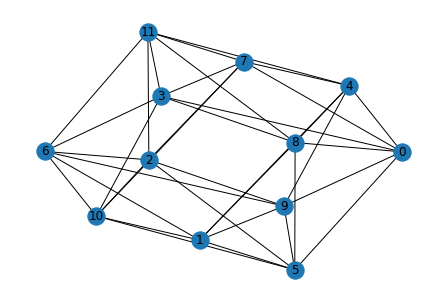

In [55]:
# Don't run block if you don't want to visualize
import networkx as nx
nx.draw(nx.from_numpy_matrix(tg.adj), with_labels = True,)

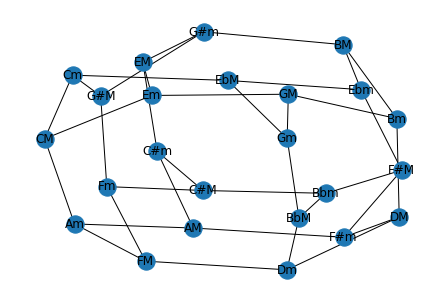

In [56]:
labeldict = dict(zip(list(range(len(sg.nodes))), sg.nodes))
nx.draw(nx.from_numpy_matrix(sg.adj), labels=labeldict, with_labels = True)


## Trajectories

```shell
google-chrome https://www.youtube.com/watch?v=NQ7LkWCzKxI
```

